# NTSB Exploration & Visualization
***

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('../data/ntsb/cleaned/master.csv')
df = df.loc[(df['ev_country']=='USA') & (df['ev_type']=='ACC')] # Limit to US accidents 
df.drop(columns=['ev_country', 'ev_type'], inplace=True)

data = df.loc[~df['inj_tot_t'].isna()]
## clean more : impute ground injury values
data[['inj_f_grnd', 'inj_m_grnd', 'inj_s_grnd']]= data[['inj_f_grnd', 'inj_m_grnd', 'inj_s_grnd']].fillna(0) 
data['ground_injury_total'] = data[['inj_f_grnd', 'inj_m_grnd', 'inj_s_grnd']].sum(axis=1)

/var/folders/c8/jr_n0v1x3n52_hpzs9nlqykw0000gn/T/ipykernel_23089/2463442858.py:8: DtypeWarning: Columns (0,30,31,32,33,34,35,36,37,40,41,42,43,46,47,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/ntsb/cleaned/master.csv')
/var/folders/c8/jr_n0v1x3n52_hpzs9nlqykw0000gn/T/ipykernel_23089/2463442858.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['inj_f_grnd', 'inj_m_grnd', 'inj_s_grnd']]= data[['inj_f_grnd', 'inj_m_grnd', 'inj_s_grnd']].fillna(0)
/var/folders/c8/jr_n0v1x3n52_hpzs9nlqykw0000gn/T/ipykernel_23089/2463442858.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

***
# Checking Correlations (Categorical & Continuous)

## Cramers' V for Categorical Variables

This section checks the 

In [9]:
def cramers_v(x, y):
    """Calculates Cramer's V for categorical Variables.
    x: first categorical variable
    y: second categorical variable

    Returns Cramer's V stat of correlation among categorical variables
    """
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = np.sum(confusion_matrix.values)
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

In [25]:
cramer_df = pd.DataFrame(columns=['feature','corr'])
for i in data.select_dtypes('object'):
    update = pd.DataFrame({'feature':[i],
                           'corr': cramers_v(data[i],data['damage'])})
    cramer_df = pd.concat([cramer_df,update],ignore_index=True)

/var/folders/c8/jr_n0v1x3n52_hpzs9nlqykw0000gn/T/ipykernel_23089/2567436528.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cramer_df = pd.concat([cramer_df,update],ignore_index=True)
/var/folders/c8/jr_n0v1x3n52_hpzs9nlqykw0000gn/T/ipykernel_23089/3536291339.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))


In [45]:
cramer_df = cramer_df.sort_values(by='corr')

In [46]:
cramer_df

,feature,corr
16,homebuilt,0.022172
22,second_pilot,0.037766
15,acft_category,0.064368
5,light_cond,0.072032
17,fixed_retractable,0.112101
8,eng_type,0.169087
12,acft_expl,0.192751
21,type_fly,0.227212
9,far_part,0.260223
6,ev_highest_injury,0.299698


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, 'homebuilt'),
  Text(1, 0, 'second_pilot'),
  Text(2, 0, 'acft_category'),
  Text(3, 0, 'light_cond'),
  Text(4, 0, 'fixed_retractable'),
  Text(5, 0, 'eng_type'),
  Text(6, 0, 'acft_expl'),
  Text(7, 0, 'type_fly'),
  Text(8, 0, 'far_part'),
  Text(9, 0, 'ev_highest_injury'),
  Text(10, 0, 'acft_fire'),
  Text(11, 0, 'on_ground_collision'),
  Text(12, 0, 'acft_make'),
  Text(13, 0, 'date_last_insp'),
  Text(14, 0, 'acft_model'),
  Text(15, 0, 'latitude'),
  Text(16, 0, 'longitude'),
  Text(17, 0, 'finding_description'),
  Text(18, 0, 'ntsb_no'),
  Text(19, 0, 'ev_id'),
  Text(20, 0, 'owner_acft'),
  Text(21, 0, 'event_key'),
  Text(22, 0, 'damage'),
  Text(23, 0, 'certs_held')])

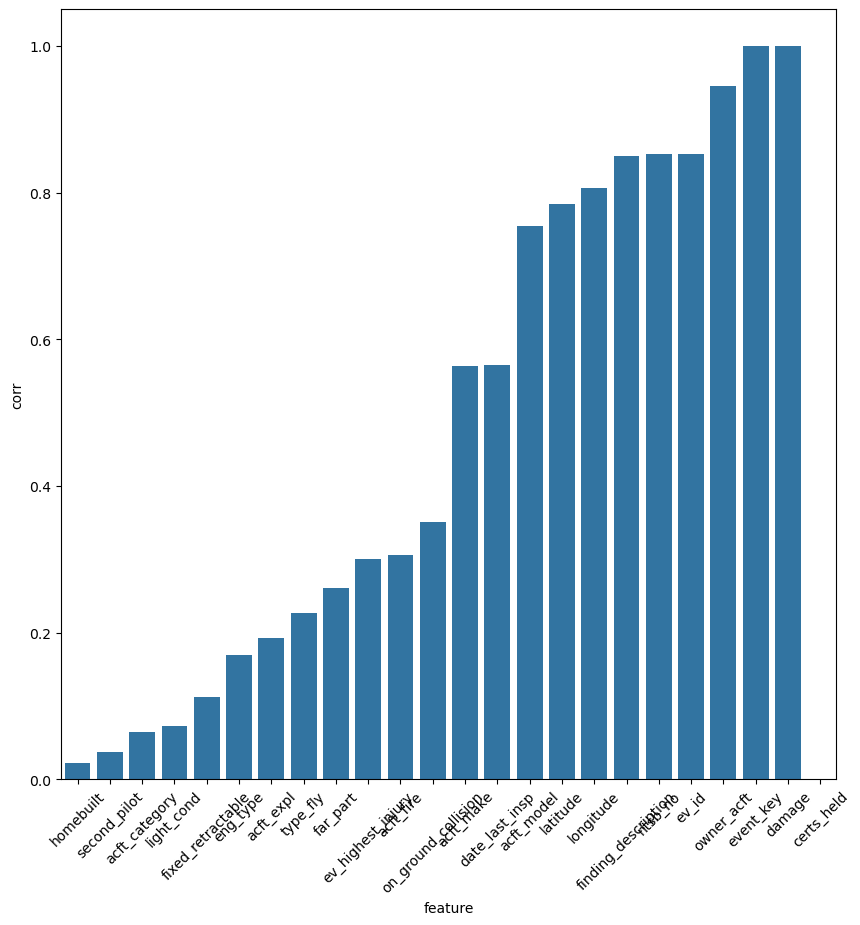

In [53]:
plt.figure(figsize=(10,10))
sns.barplot(data=cramer_df,
            x='feature',
            y='corr')
plt.xticks(rotation=45)

## Spearman's Rank Correlation

In [41]:
spear_df = pd.DataFrame(columns=['feature','corr'])
for i in data.select_dtypes('int'):
    update = pd.DataFrame({'feature':[i],
                           'corr': spearmanr(data[i],data['ev_highest_injury'])[1]})
    spear_df = pd.concat([spear_df,update],ignore_index=True)

/var/folders/c8/jr_n0v1x3n52_hpzs9nlqykw0000gn/T/ipykernel_23089/2492736908.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  spear_df = pd.concat([spear_df,update],ignore_index=True)


In [42]:
spear_df

,feature,corr
0,ev_year,0.237569
1,ev_month,0.006310
2,inj_tot_f,0.000000
3,inj_tot_m,0.000000
4,inj_tot_n,0.000000
5,inj_tot_s,0.000000
6,Aircraft_ID,0.008864


*** 
# Visualization

In [34]:
data.select_dtypes('int').corr()

,ev_year,ev_month,inj_tot_f,inj_tot_m,inj_tot_n,inj_tot_s,Aircraft_ID
ev_year,1.000000,-0.010514,-0.008238,-0.001745,0.012437,0.001466,-0.026924
ev_month,-0.010514,1.000000,0.003844,0.009062,-0.004080,0.015064,0.012381
inj_tot_f,-0.008238,0.003844,1.000000,-0.036440,-0.048832,0.001980,0.038966
inj_tot_m,-0.001745,0.009062,-0.036440,1.000000,0.069287,0.408775,-0.003288
inj_tot_n,0.012437,-0.004080,-0.048832,0.069287,1.000000,0.077106,0.126461
inj_tot_s,0.001466,0.015064,0.001980,0.408775,0.077106,1.000000,-0.002364
Aircraft_ID,-0.026924,0.012381,0.038966,-0.003288,0.126461,-0.002364,1.000000


<Axes: >

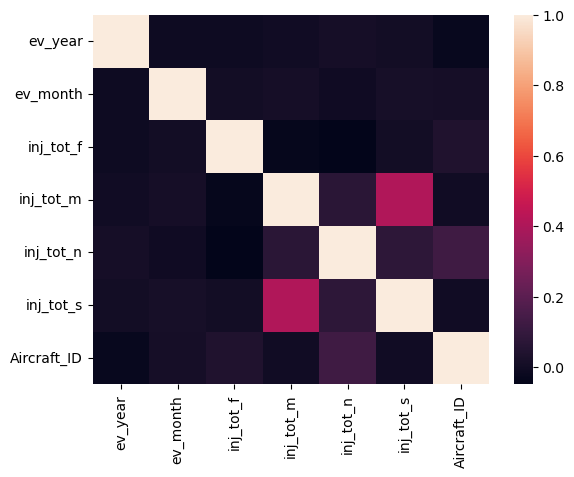

In [3]:
sns.heatmap(data.select_dtypes('int').corr())